In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('product_features_rank_MHQ.csv')
data.head()

,ItemLookupcode,Product_Line,Item_description,C,G,Ke,Ko,N,O,V,...,Pasta and noodles,Ready to eat meals,Savoury and Salty Snacks,Spreads and Dips,Sweeteners,Supplements and body care,unique_customers,sales,units,sales_rank
0,85,Nutilight - No Sugar Added Sweet Nut Spreads,Hazelnut Spread with Cocoa,0,1,1,1,1,0,1,...,0,0,0,1,0,0,157,345996,45038,1
1,8259,Swerve - Ultimate Sugar Replacement,Icing Sugar,0,1,1,1,1,0,1,...,0,0,0,0,1,0,158,230867,30509,2
2,180,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Icing Sugar Sweetener,0,1,1,1,1,0,1,...,0,0,0,0,1,0,71,225078,1590,3
3,8260,Swerve - Ultimate Sugar Replacement,Granular,0,1,1,1,1,0,1,...,0,0,0,0,1,0,150,222887,29600,4
4,8532,Joseph's Bakery,Pita,0,0,0,1,0,0,0,...,0,0,0,0,0,0,124,207795,70622,5


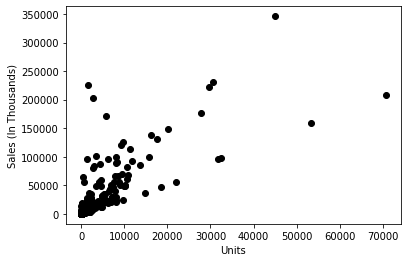

In [3]:
X = data[["sales","units"]]
#Visualise data points
plt.scatter(X["units"],X["sales"],c='black')
plt.xlabel('Units')
plt.ylabel('Sales (In Thousands)')
plt.show()

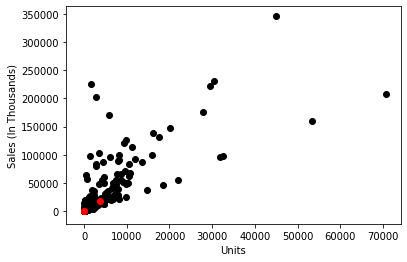

In [4]:
#Steps 1 and 2 of K-Means were about choosing the number of clusters (k) and selecting random centroids for 
#each cluster. We will pick 3 clusters and then select random observations from the data as the centroids:

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["units"],X["sales"],c='black')
plt.scatter(Centroids["units"],Centroids["sales"],c='red')
plt.xlabel('Units')
plt.ylabel('Sales (In Thousands)')
plt.show()

In [5]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["units"]-row_d["units"])**2
            d2=(row_c["sales"]-row_d["sales"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["sales","units"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['sales'] - Centroids['sales']).sum() + (Centroids_new['units'] - Centroids['units']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["sales","units"]]

/Users/hemapriya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hemapriya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


45640.969340163385
27956.851604541844
33292.597135783464
21491.69597814633
15112.396018197433
15913.261793394482
22771.536768845093
32445.968188679864
19875.256722333128
11729.59120818758
10212.650311787616
10174.556330384257
1025.9131139311137
0.0


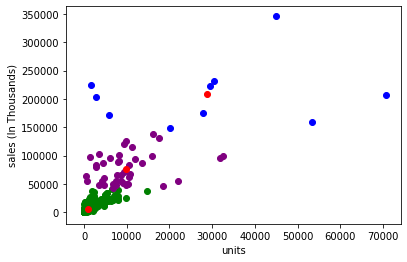

In [6]:
color=['blue','green','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["units"],data["sales"],c=color[k])
plt.scatter(Centroids["units"],Centroids["sales"],c='red')
plt.xlabel('units')
plt.ylabel('sales (In Thousands)')
plt.show()